# Graphs

A **graph** is an object consisting of two sets called its vertex set and its edge set. The vertex set is a finite nonempty set. The edge set may be empty, but otherwise its elements are two-element subsets of the vertex set.

**Set**: A set is a collection of distinct objects, none of which is the set itself.

$A = \{1,2,3\}$

$B = \{1,2,3,4,5\}$

$A \subset B$ A is a subset of B.

$J = \{\}$ J is an empty set or null set.

A set can never have redundant elements. A set can be denoted as $\phi$.

In [120]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import network and graph libraries
import networkx as nx

# Set display params
plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams["figure.max_open_warning"] = 200
# General plot parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.autolimit_mode'] = 'data'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

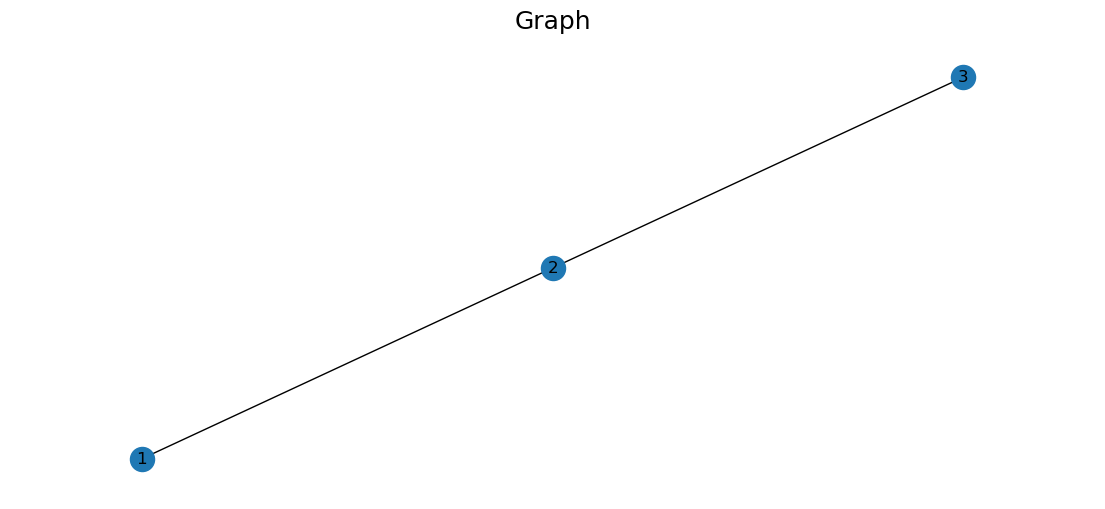

In [121]:
# Create an empty graph object
G = nx.Graph()

# Add nodes to the graph
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges to the graph
G.add_edge(1, 2)
G.add_edge(2, 3)

# Draw the graph
nx.draw_networkx(G, with_labels=True)
plt.title('Graph')
plt.show()


## Multigraph

Vertices joined to themselves are called loops and multiple edges to the same pair of vertices are called skeins. Considering them would result in a class of graphs called **multigraph** (skeins and no loops) and **pseudograph** (allowing both).

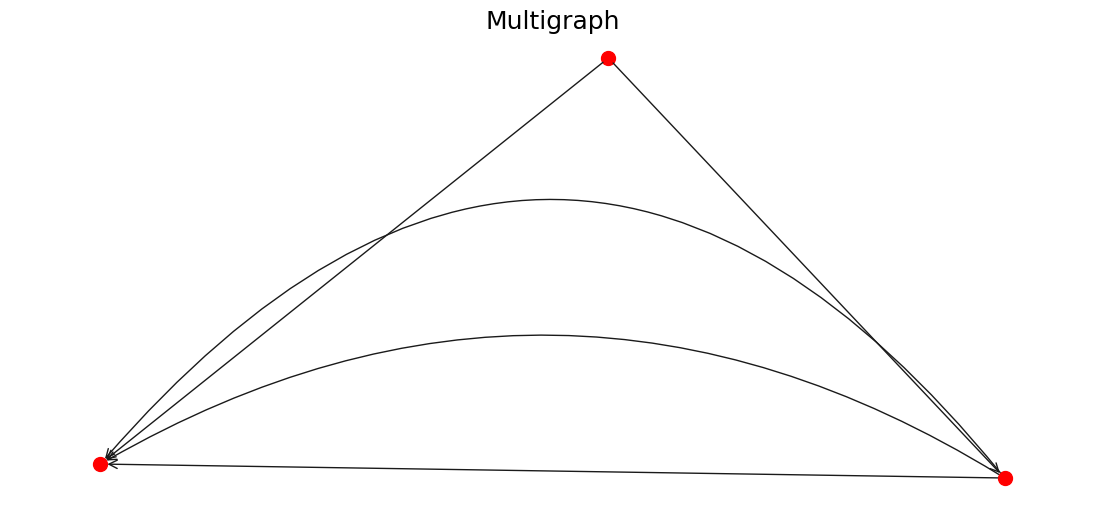

In [118]:
G=nx.MultiGraph ([(1,2),(1,2),(2,1),(3,1),(3,2),(3,3)])
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.1",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.title('Multigraph')
plt.show()

## Pseudoraph

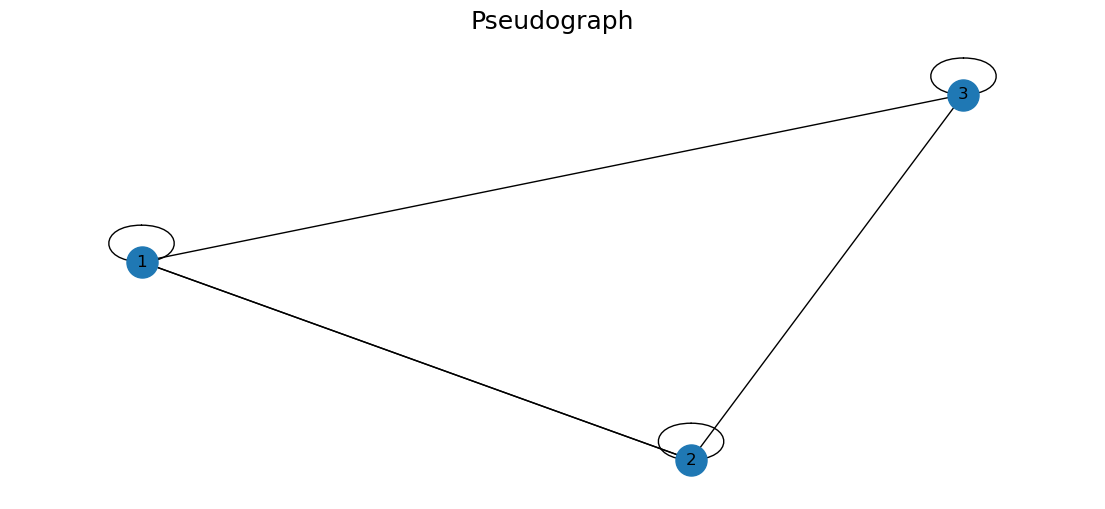

In [117]:
# Create a pseudograph object
G = nx.MultiGraph()

# Add nodes to the pseudograph
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges to the pseudograph
G.add_edge(1, 2)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
G.add_edge(1, 1)
G.add_edge(2, 2)
G.add_edge(3, 3)
# Draw the pseudograph with self-loops
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title('Pseudograph')
plt.show()


## Null graph

When the edges are directed, its called **digraph**.

When there are no edges or set $e = \{\}$ then it is called a **null graph**.

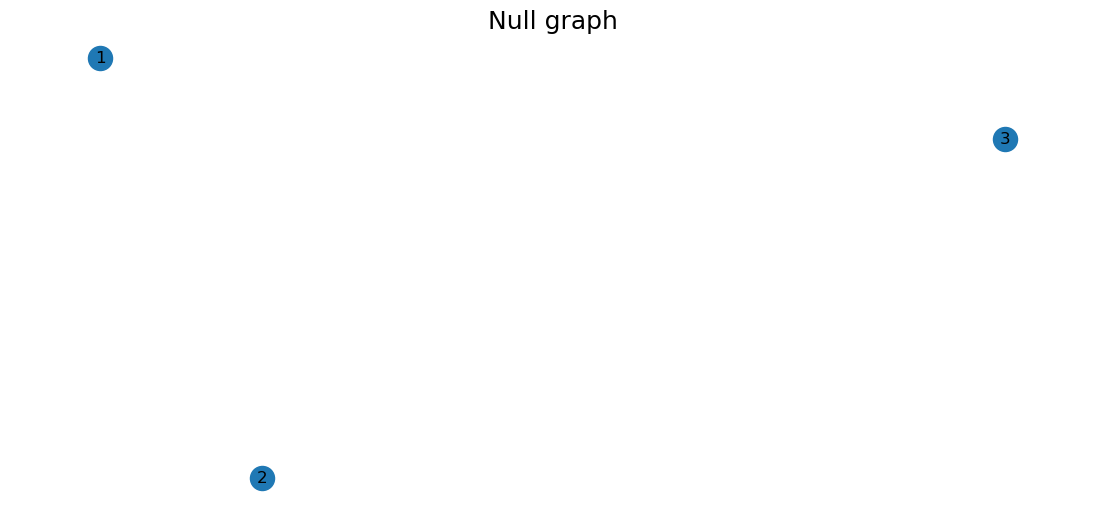

In [116]:
# Create an empty graph object
G = nx.Graph()

# Add nodes to the graph
G.add_node(1)
G.add_node(2)
G.add_node(3)


# Draw the graph
nx.draw_networkx(G, with_labels=True)
plt.title('Null graph')
plt.show()

## Complete graph

When the graph has all possible edges, it is called as **complete graph**.

Text(0.5, 1.0, 'Complete graph')

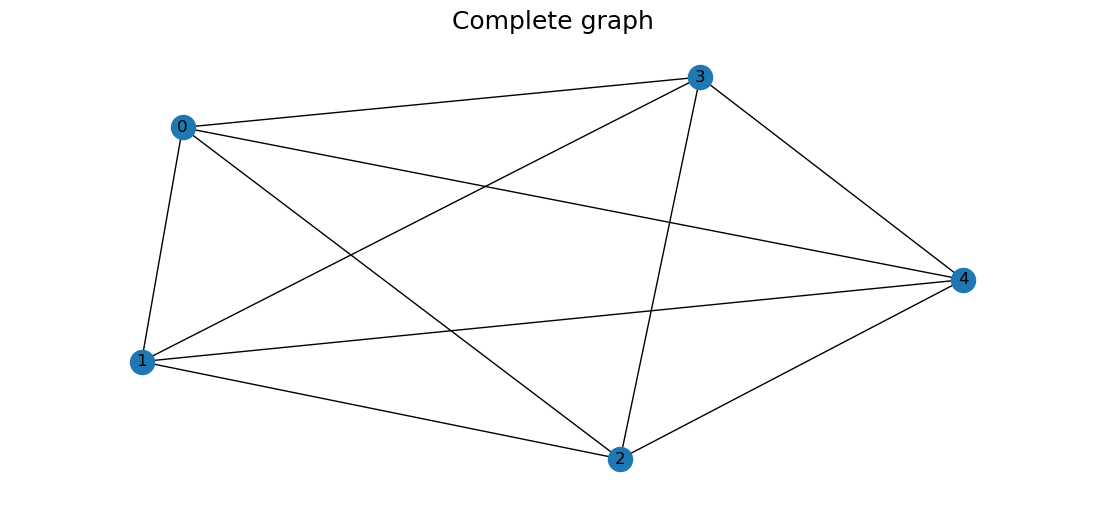

In [115]:
G = nx.complete_graph(5)
nx.draw_networkx(G)
plt.title('Complete graph')

## Utility graph

The **utility graph**, is the graph having vertex set $\{A, B, C, X, Y, Z\}$ and edge set $\{\{A, X\}, \{A, Y\}, \{A, Z\}, \{B, X\}, \{B, Y\}, \{B, Z\} \{C, X\}, \{C, Y\}, \{C, Z\}\}$

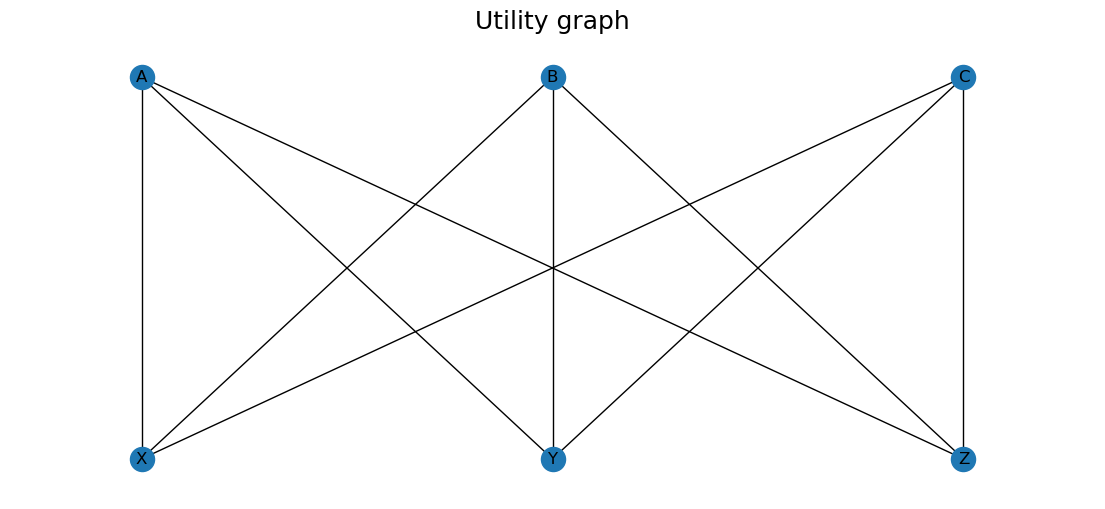

In [111]:
# Create an empty graph object
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(["A", "B", "C", "X", "Y", "Z"])

# Add edges to the graph
G.add_edges_from([("A", "X"), ("A", "Y"), ("A", "Z"),
                  ("B", "X"), ("B", "Y"), ("B", "Z"),
                  ("C", "X"), ("C", "Y"), ("C", "Z")])

# Set the position of the nodes
pos = {
    "A": (0, 1),
    "B": (1, 1),
    "C": (2, 1),
    "X": (0, 0),
    "Y": (1, 0),
    "Z": (2, 0),
}

# Draw the graph
nx.draw_networkx(G, pos, with_labels=True)
plt.title('Utility graph')
# Show the graph
plt.show()


## Complement of a graph

The **complement** of a graph $G$ is $\overline{G}$ that has the edge set that are not present in the edge set of $G$.

Text(0.5, 1.0, 'Complement of graph')

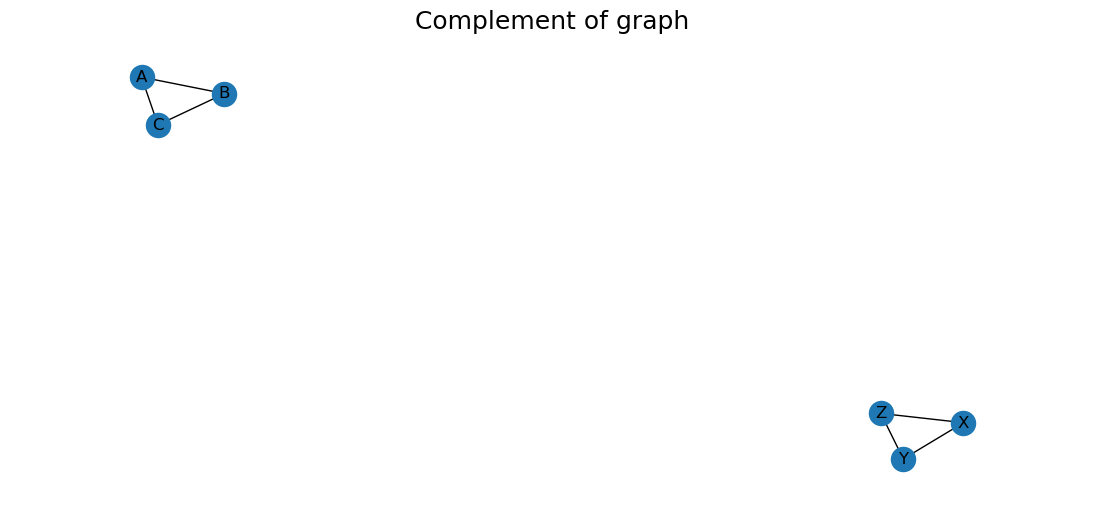

In [113]:
G_hat = nx.complement(G)
nx.draw_networkx(G_hat, with_labels=True)
plt.title('Complement of graph')

**Null graphs** and **complete graphs** are complementary. That is, for every positive integer $v$, $\overline{N_{v}}$ is equal to $K_{v}$ and $\overline{K_{v}}$ is equal to $N_{v}$.

## Subgraph

A graph $H$ is a **subgraph** of a graph $G$ if the vertex set of $H$ is a subset of the vertex set of $G$ and the edge set of $H$ is a subset of the edge set of $G$.

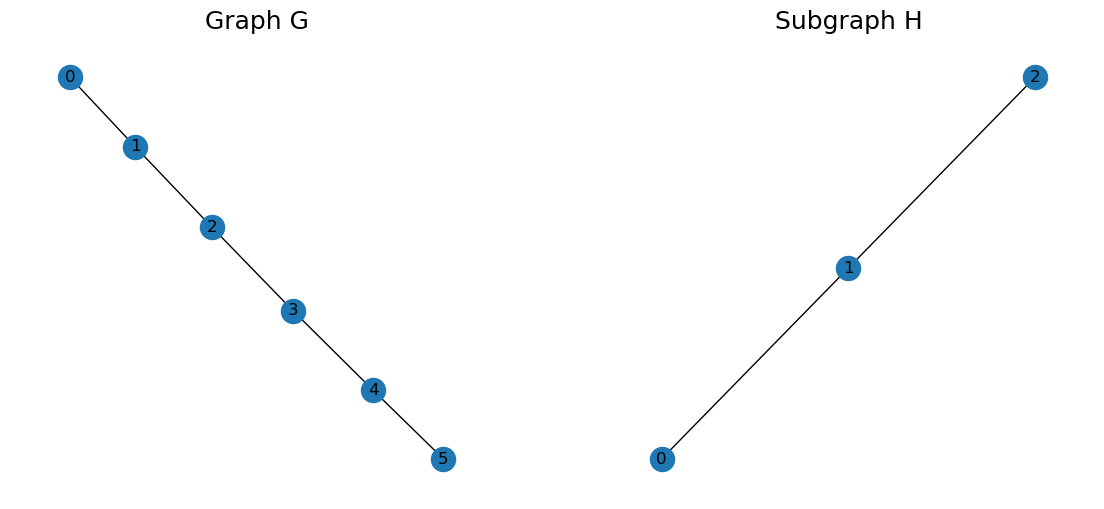

In [107]:
# Create graph G
G = nx.path_graph(6)

# Create subgraph H
H = G.subgraph([0, 1, 2])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2)

# Draw G on the first subplot
nx.draw_networkx(G, ax=ax1)
ax1.set_title("Graph G")

# Draw H on the second subplot
nx.draw_networkx(H, ax=ax2)
ax2.set_title("Subgraph H")

# Show the figure
plt.show()

## Isomorphic graphs

Two graphs are said to be **isomorphic** if there exists between their vertex sets a one-to-one correspondence having the property that whenever two vertices are adjacent in either graph, the corresponding two vertices are adjacent in the other graph. Such a one-to-one correspondence is called an **isomorphism** (from Greek roots meaning *“same structure”*). If $G$ and $H$ are isomorphic graphs we denote this by writing “$G$ ≅ $H$”.

The **degree** of a vertex is the number of incidents to it.

Properties preserved by isomorphism:

1) The number of vertices.

2) The number of edges.

3) The distribution of degrees.

4) The number of pieces in it.

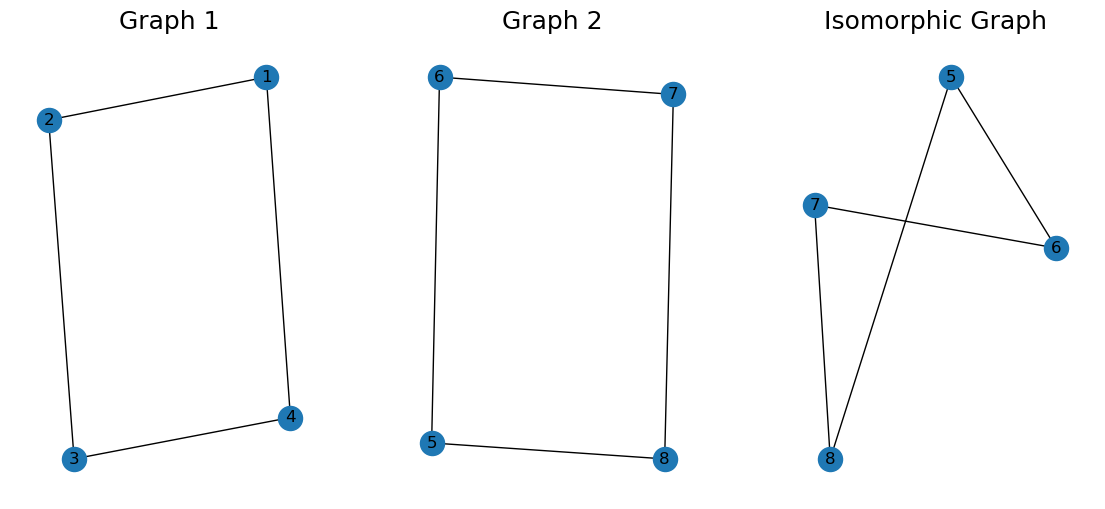

True

In [106]:
import networkx.algorithms.isomorphism as iso

# Create the first graph
G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3, 4])
G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Create the second graph
G2 = nx.Graph()
G2.add_nodes_from([5, 6, 7, 8])
G2.add_edges_from([(5, 6), (6, 7), (7, 8), (8, 5)])

# Define a mapping between the nodes of G1 and G2
mapping = {1: 5, 2: 6, 3: 7, 4: 8}

# Create the isomorphic graph
G3 = nx.relabel_nodes(G1, mapping)

# Draw the graphs
fig, axs = plt.subplots(1, 3)
nx.draw_networkx(G1, ax=axs[0])
nx.draw_networkx(G2, ax=axs[1])
nx.draw_networkx(G3, ax=axs[2])
axs[0].set_title("Graph 1")
axs[1].set_title("Graph 2")
axs[2].set_title("Isomorphic Graph")
plt.show()
nx.is_isomorphic(G1, G2)  # no weights considered


## Planar graph

A graph is **planar** if it is isomorphic to a graph that has been drawn in a plane without edge-crossings. Otherwise a graph is **nonplanar**.

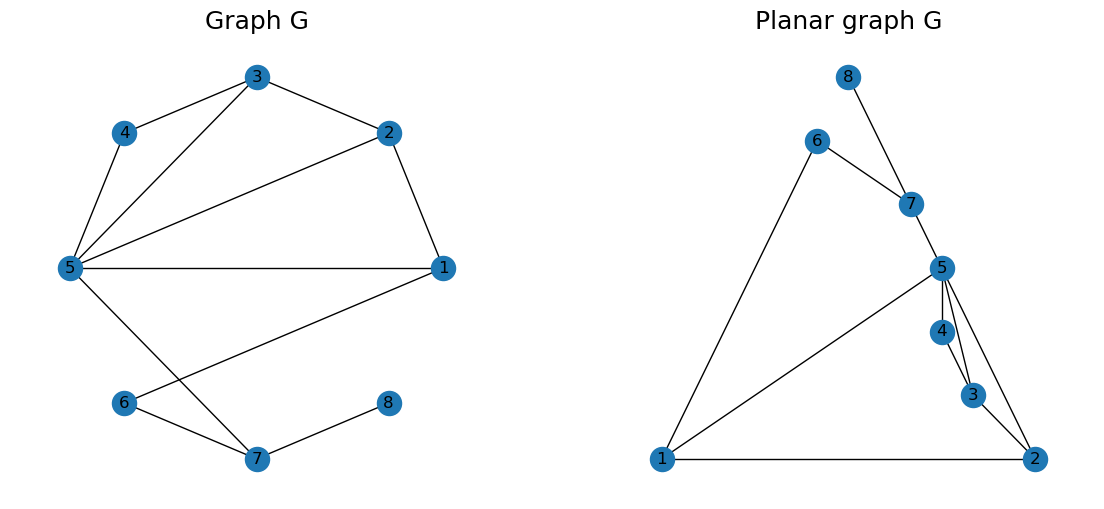

In [131]:
# Create a graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edges_from([(1, 2), (1, 5), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (4, 5), (5, 7), (6, 7), (7, 8)])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2)

pos = nx.circular_layout(G)
nx.draw_networkx(G, pos,with_labels=True, ax=ax1)
ax1.set_title("Graph G")

# Draw the planar graph
pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True, ax=ax2)
ax2.set_title("Planar graph G")

plt.show()

A **continuous curve** is closed if the starting point and ending point are the same.And a continuous closed curve is **simple** if no point other than the starting point is repeated, and the starting point itself is repeated only once.

The **Jordan Curve Theorem** says that any such thing embedded in a plane cuts the plane into two regions—the inside and the outside—and that any unbroken curve drawn in the plane from a point inside to a point outside must somewhere cross the rubber band. The corollary says that if two points on the rubber band are joined by an unbroken curve in the plane that doesn’t touch the rubber band anywhere else, then that unbroken curve must be either entirely inside the rubber band or entirely outside it.

`````{tip}
In mathematics, the **pigeonhole** principle states that if n items are put into m containers, with n > m, then at least one container must contain more than one item.
`````

1. $UG$ (Utility graph) and $K_5$ (complete graph) are non-planar.
2. Any subgraph of a planar graph is planar.
3. If a graph $H$ is a subgraph of a graph $G$, we will also say that G is a **supergraph** of H.

If some new vertices of degree 2 are added to some of the edges of a graph $G$, the resulting graph $H$ is called an **expansion** of $G$.

4. Every expansion of $UG$ or $K_5$ is nonplanar.
5. Every supergraph of an expansion of $UG$ or $K_5$ is nonplanar.

**Kuratowski’s Theorem**: Every nonplanar graph is a supergraph of an expansion of $UG$ or $K_5$.

6. The set of all **nonplanar graphs** is equal to the set of all graphs that are supergraphs of expansions of $UG$ or $K_5$.
7. The set of all **planar graphs** is equal to the set of all graphs that are not supergraphs of expansions of $UG$ or $K_5$.

## Euler's formula

1. A walk in a graph is a sequence $A_1$ $A_2$ $A_3$ ... An of not necessarily distinct vertices in which $A_1$ is joined by an edge to $A_2$, $A_2$ is joined by an edge to $A_3$, ..., and $A_n$ − 1 is joined by an edge to $A_n$. The walk $A_1$ $A_2$ $A_3$ ... $A_n$ is said to join $A_1$ and $A_n$.
2. Any sequence of distinct vertices in $K_v$ is a walk.
3. A null graph $N_v$ has no walks.
4. A graph is said to be **connected** if every pair of vertices is joined by a walk. Otherwise a graph is said to be **disconnected**.
5. Every **cyclic graph** is connected, as is every complete graph.
6. Except for $N_1$, all null graphs are disconnected.

### Faces of a graph

7. When a planar graph is actually drawn in a plane without edge-crossings, it cuts the plane into regions called faces of the graph. The letter $“f”$ shall denote the number of faces of a planar graph.

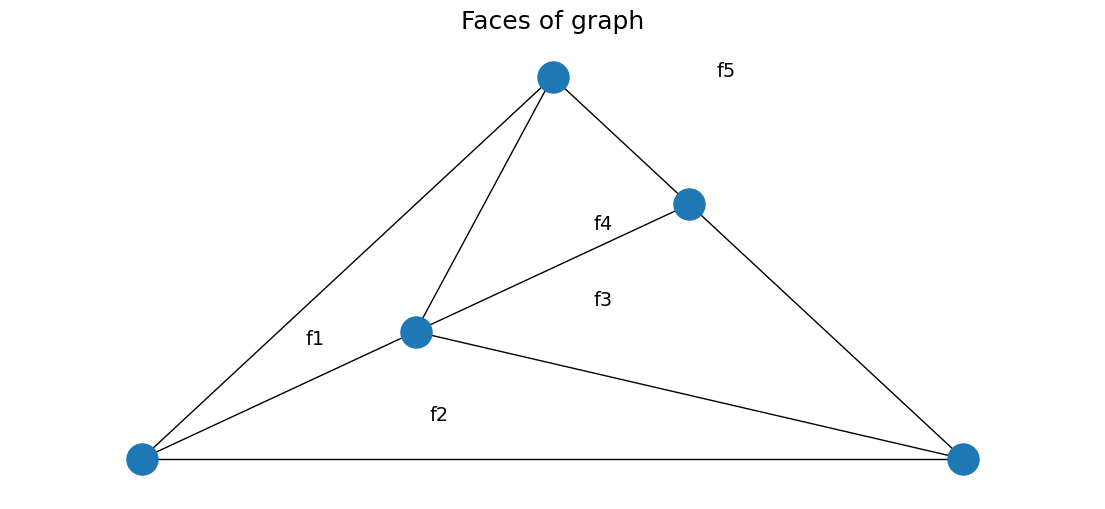

In [156]:
# Create a graph with 5 nodes and 8 edges
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,1), (1,5), (2,5), (3,5), (4,5)])

# Get node positions for a planar layout
pos = nx.planar_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw the edges
nx.draw_networkx_edges(G, pos)

# Add the face labels
plt.text(-0.6, -0.1, 'f1', fontsize=14)
plt.text(-0.3, -0.3, 'f2', fontsize=14)
plt.text(0.1, 0.001, 'f3', fontsize=14)
plt.text(0.1, 0.2, 'f4', fontsize=14)
plt.text(0.4, 0.6, 'f5', fontsize=14)

# Show the plot
plt.title('Faces of graph')
plt.show()


8. A graph is polygonal if it is planar, connected, and has the property that every edge borders on two different faces.

**Euler’s Formula says that for planar connected graphs $v$ + $f$ − $e$ is constant, and the constant is 2**

**Topology** is a purely qualitative subject where quantity is banned. In it two figures are always equivalent if it is possible to pass from one to the other by a continuous deformation, whose mathematical law can be of any sort whatsoever as long as continuity is respected.

## Platonic graphs

“A graph is **regular** if all the vertices have the same degree. If the common value of the degrees of a regular graph is the number $d$, we say that the graph is regular of degree $d$.

1. Any cyclic graph $C_v$ is regular of degree 2.
2. Any complete graph $K_v$ is regular of degree $v$ − 1.
3. Any null graph $N_v$ is regular of degree 0.
4. $UG$ is regular of degree 3.